# 1. Judul / Topik Project dan Identitas Lengkap

## Judul : Prediksi Diabetes Menggunakan K-Nearest Neighbors

### Identitas Lengkap:
Nama: Ariawan Soffan Farajaya <br>
NIM: A11.2022.14112 <br>
Kelompok : Machine Learning 4410

<br>

# 2. Ringkasan dan Permasalahan project + Tujuan yang akan dicapai + Model / Alur Penyelesaian
## Ringkasan
Proyek ini bertujuan untuk membangun model prediksi diabetes menggunakan algoritma K-Nearest Neighbors (KNN). Data yang digunakan adalah dataset diabetes dari Pima Indian. Prediksi diabetes penting untuk deteksi dini dan pengelolaan penyakit ini.

## Permasalahan
Diabetes adalah penyakit kronis yang dapat menyebabkan komplikasi serius jika tidak terdeteksi dan dikelola dengan baik. Tujuan proyek ini adalah membangun model yang dapat memprediksi apakah seseorang mengidap diabetes berdasarkan sejumlah fitur klinis.

## Tujuan
Menganalisis dataset diabetes.
Melakukan pra-pemrosesan data dan feature engineering.
Melatih dan mengevaluasi model K-Nearest Neighbors untuk prediksi diabetes.
Mengoptimalkan hyperparameter model untuk meningkatkan akurasi.

## Model / Alur Penyelesaian:

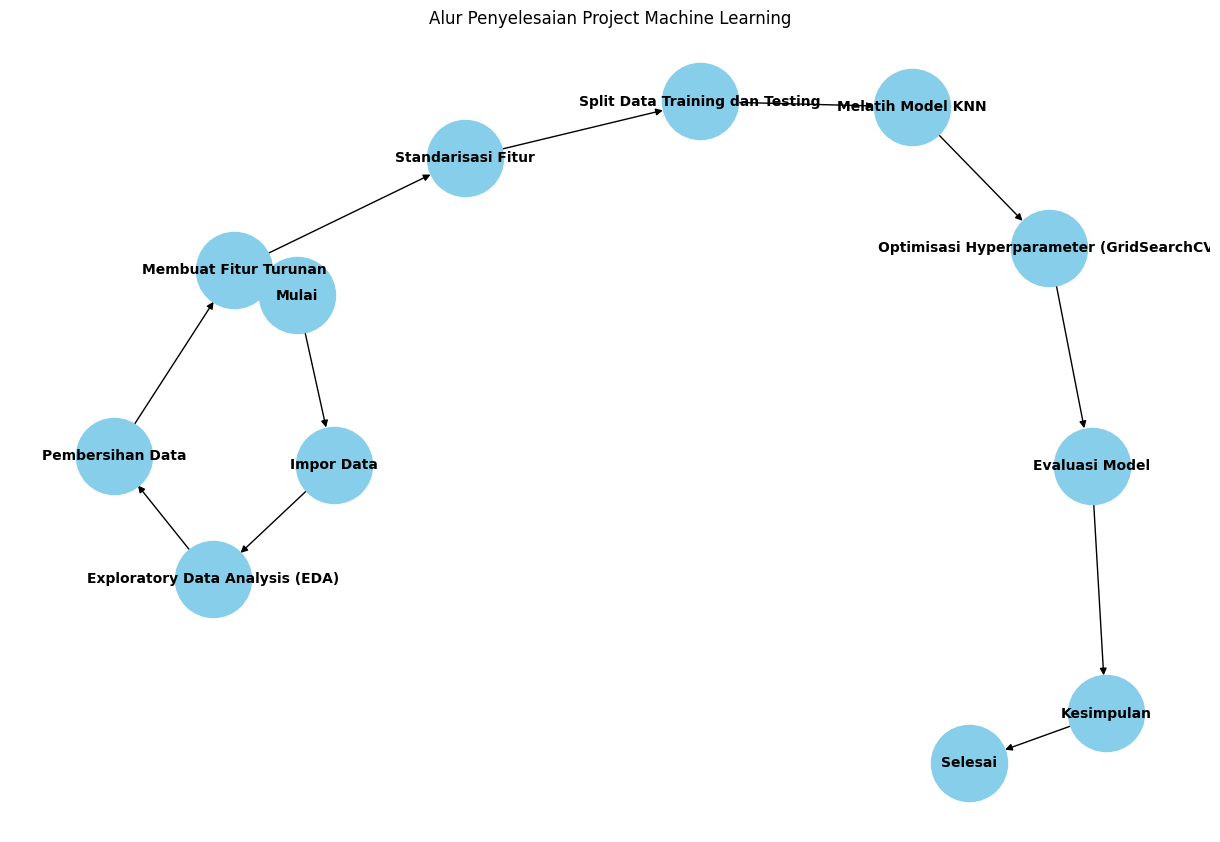

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Buat graph
G = nx.DiGraph()

# Tambahkan nodes dan edges
nodes = ["Mulai", "Impor Data", "Exploratory Data Analysis (EDA)", "Pembersihan Data", 
         "Membuat Fitur Turunan", "Standarisasi Fitur", "Split Data Training dan Testing", 
         "Melatih Model KNN", "Optimisasi Hyperparameter (GridSearchCV)", 
         "Evaluasi Model", "Kesimpulan", "Selesai"]
edges = [("Mulai", "Impor Data"), ("Impor Data", "Exploratory Data Analysis (EDA)"), 
         ("Exploratory Data Analysis (EDA)", "Pembersihan Data"), 
         ("Pembersihan Data", "Membuat Fitur Turunan"), 
         ("Membuat Fitur Turunan", "Standarisasi Fitur"), 
         ("Standarisasi Fitur", "Split Data Training dan Testing"), 
         ("Split Data Training dan Testing", "Melatih Model KNN"), 
         ("Melatih Model KNN", "Optimisasi Hyperparameter (GridSearchCV)"), 
         ("Optimisasi Hyperparameter (GridSearchCV)", "Evaluasi Model"), 
         ("Evaluasi Model", "Kesimpulan"), ("Kesimpulan", "Selesai")]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Buat layout
pos = nx.spring_layout(G)

# Gambar graf
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Alur Penyelesaian Project Machine Learning")
plt.show()


<br>

# 3. Penjelasan Dataset, EDA dan Proses Features Dataset

## Dataset
Dataset yang digunakan adalah dataset diabetes dari Pima Indian yang tersedia secara publik. Dataset ini terdiri dari beberapa fitur klinis seperti jumlah kehamilan, kadar glukosa, tekanan darah, ketebalan kulit, insulin, BMI, riwayat diabetes keluarga, dan usia.

## Exploratory Data Analysis (EDA)
EDA dilakukan untuk memahami distribusi data, mengidentifikasi outliers, dan menemukan hubungan antar fitur. Beberapa langkah yang dilakukan dalam EDA:

- Menampilkan statistik deskriptif dari dataset.
- Membuat visualisasi data seperti histogram, box plot, dan pair plot.
- Mengidentifikasi missing values.

## Proses Features Dataset
1.  Pembersihan Data: Menghapus atau mengimputasi missing values.
2. Membuat Fitur Turunan: Menghasilkan fitur baru yang mungkin lebih relevan.
3. Standarisasi Fitur: Menstandarisasi fitur untuk memastikan semua fitur memiliki skala yang sama.

# Implementasi

## Setting up Environment

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Database

In [6]:
diabetes_df = pd.read_csv('E:\Kuliah\Machine Learning\Diabetes Prediction\diabetes.csv')

In [7]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
diabetes_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

## Cek Apakah ada Null atau tidak

In [12]:
diabetes_df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [13]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Buat Copy Database

In [14]:
# Buat Copy Database
diabetes_df_copy = diabetes_df.copy(deep=True)

# Replace 0 menggunan NaN
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Show semua NaN
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Buat Histogram

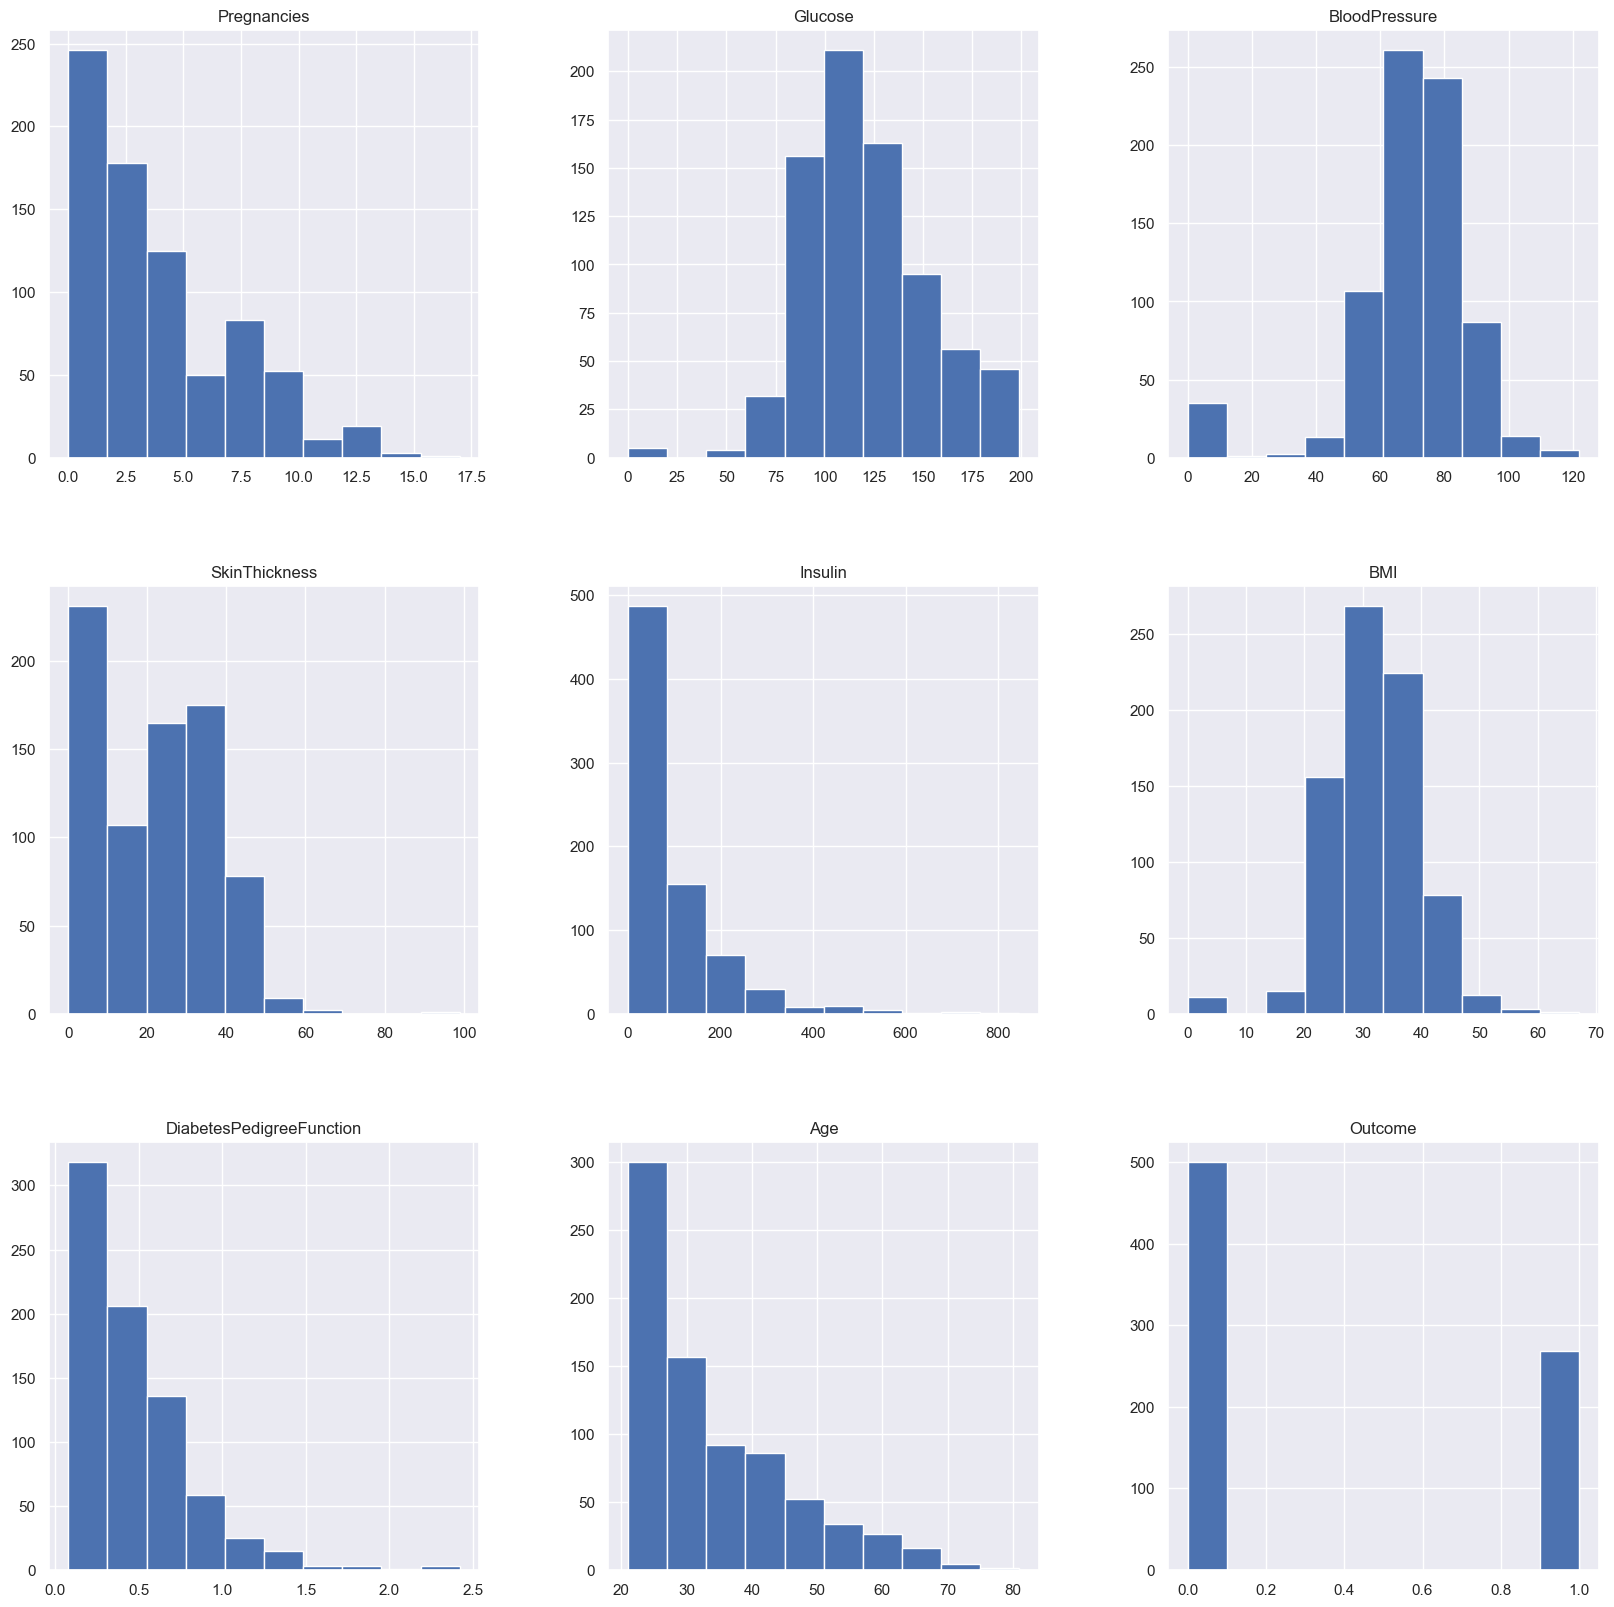

In [15]:
p = diabetes_df.hist(figsize = (20,20))

## Isi nilai-nilai yang hilang dengan rata-rata

In [16]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].mean(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].mean(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(), inplace = True)

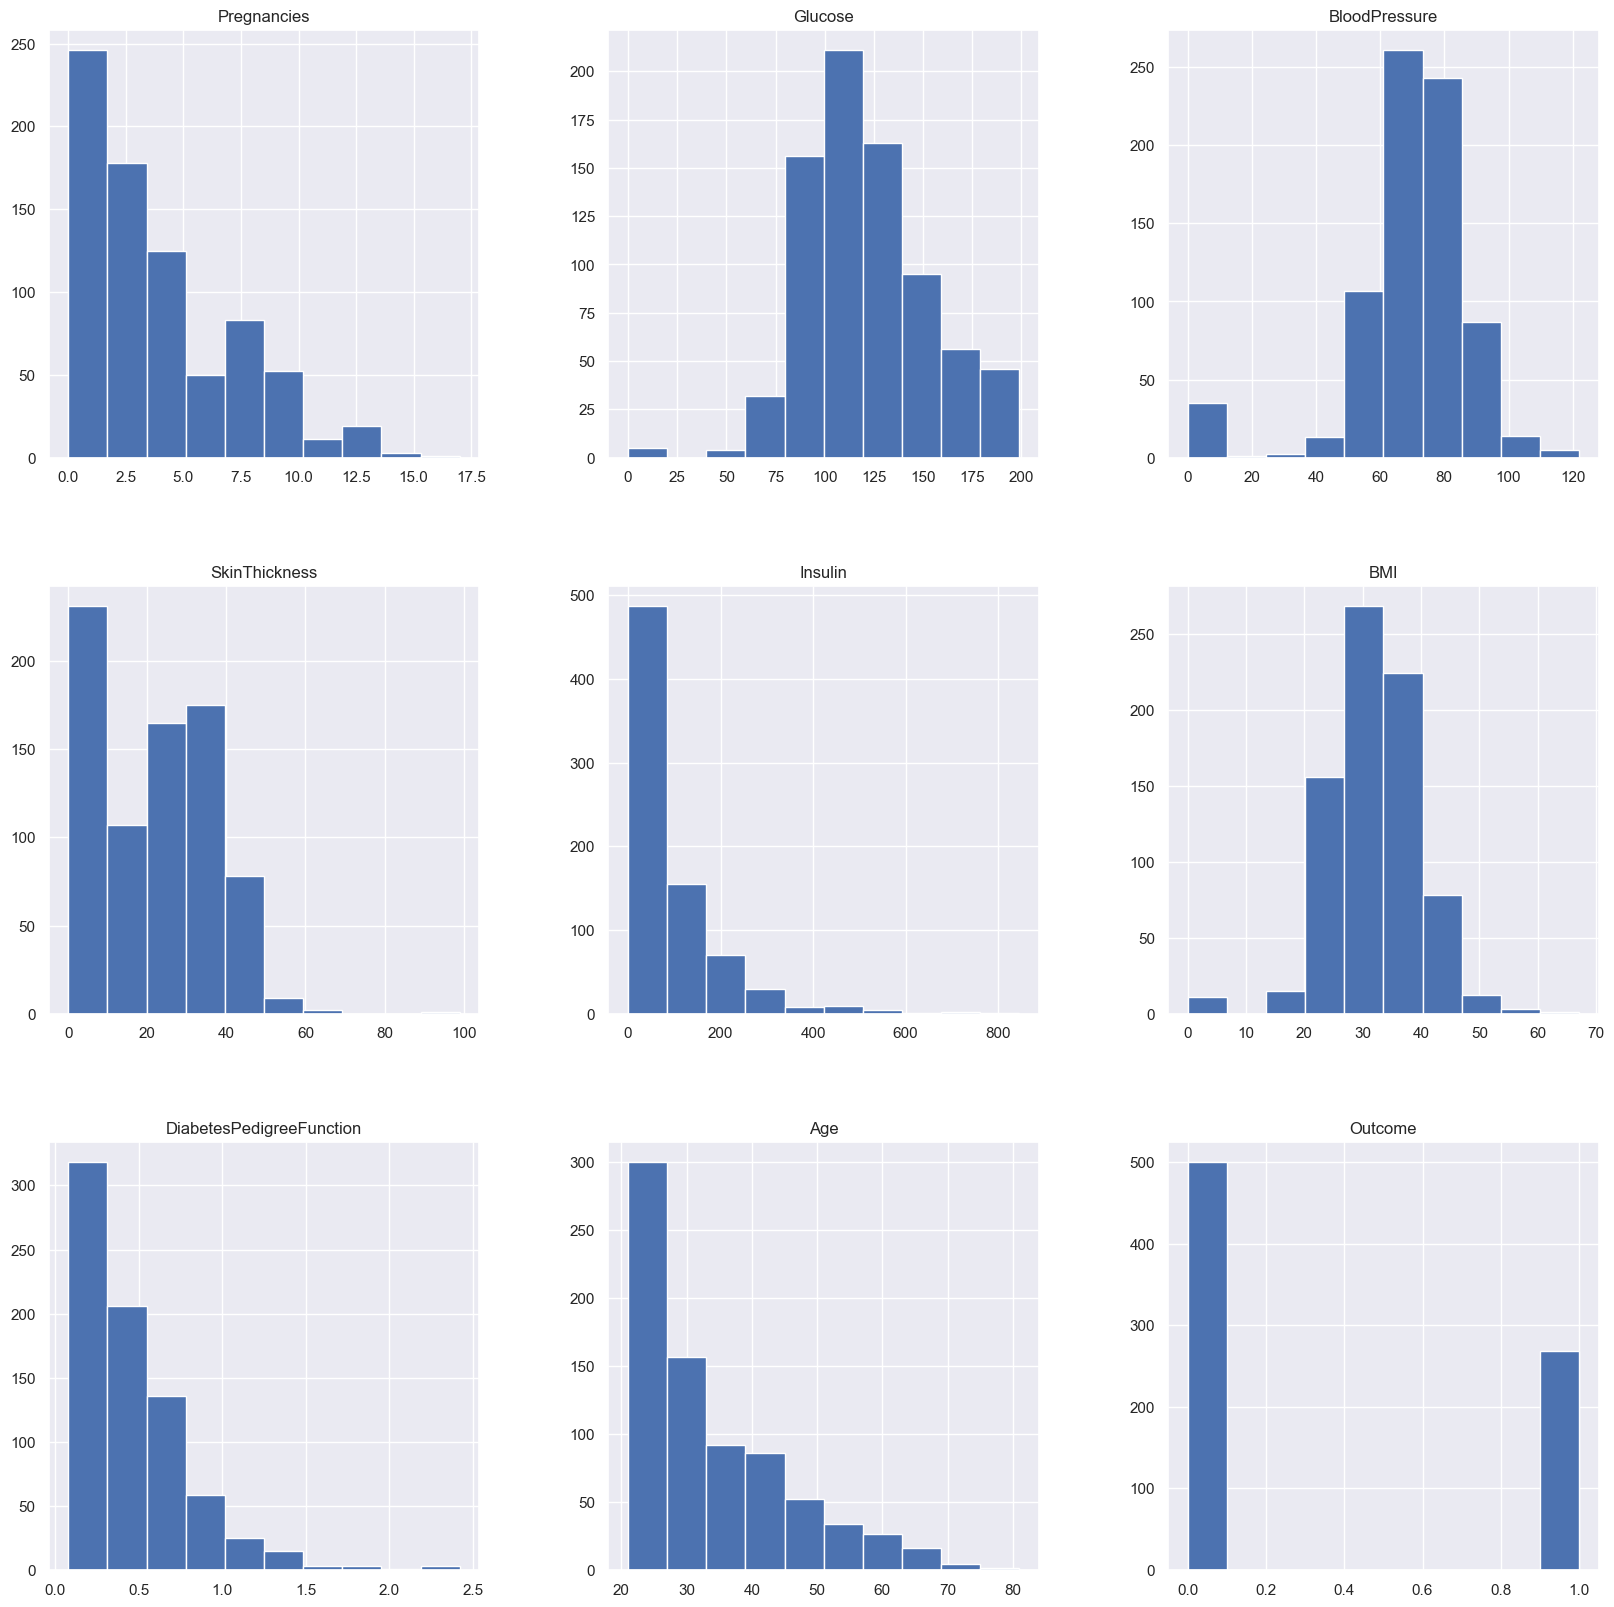

In [17]:
p = diabetes_df.hist(figsize = (20,20))

## Visualisasi Bar Plot ( Grafik Batang )

Outcome
0    500
1    268
Name: count, dtype: int64


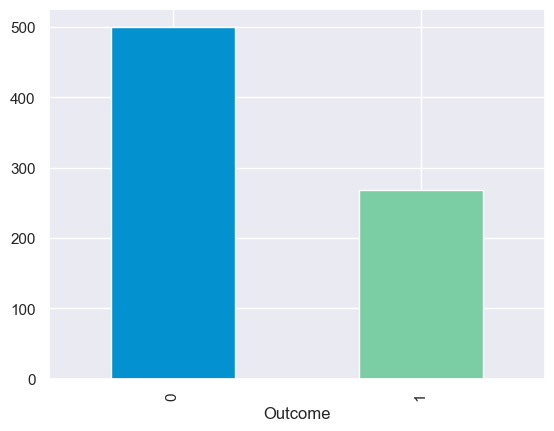

In [18]:
color_wheel = {1: "#0392cf", 2: "#7bcea3"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind="bar", color=[color_wheel[1], color_wheel[2]])
plt.show()

## Scatter Plot Matrix

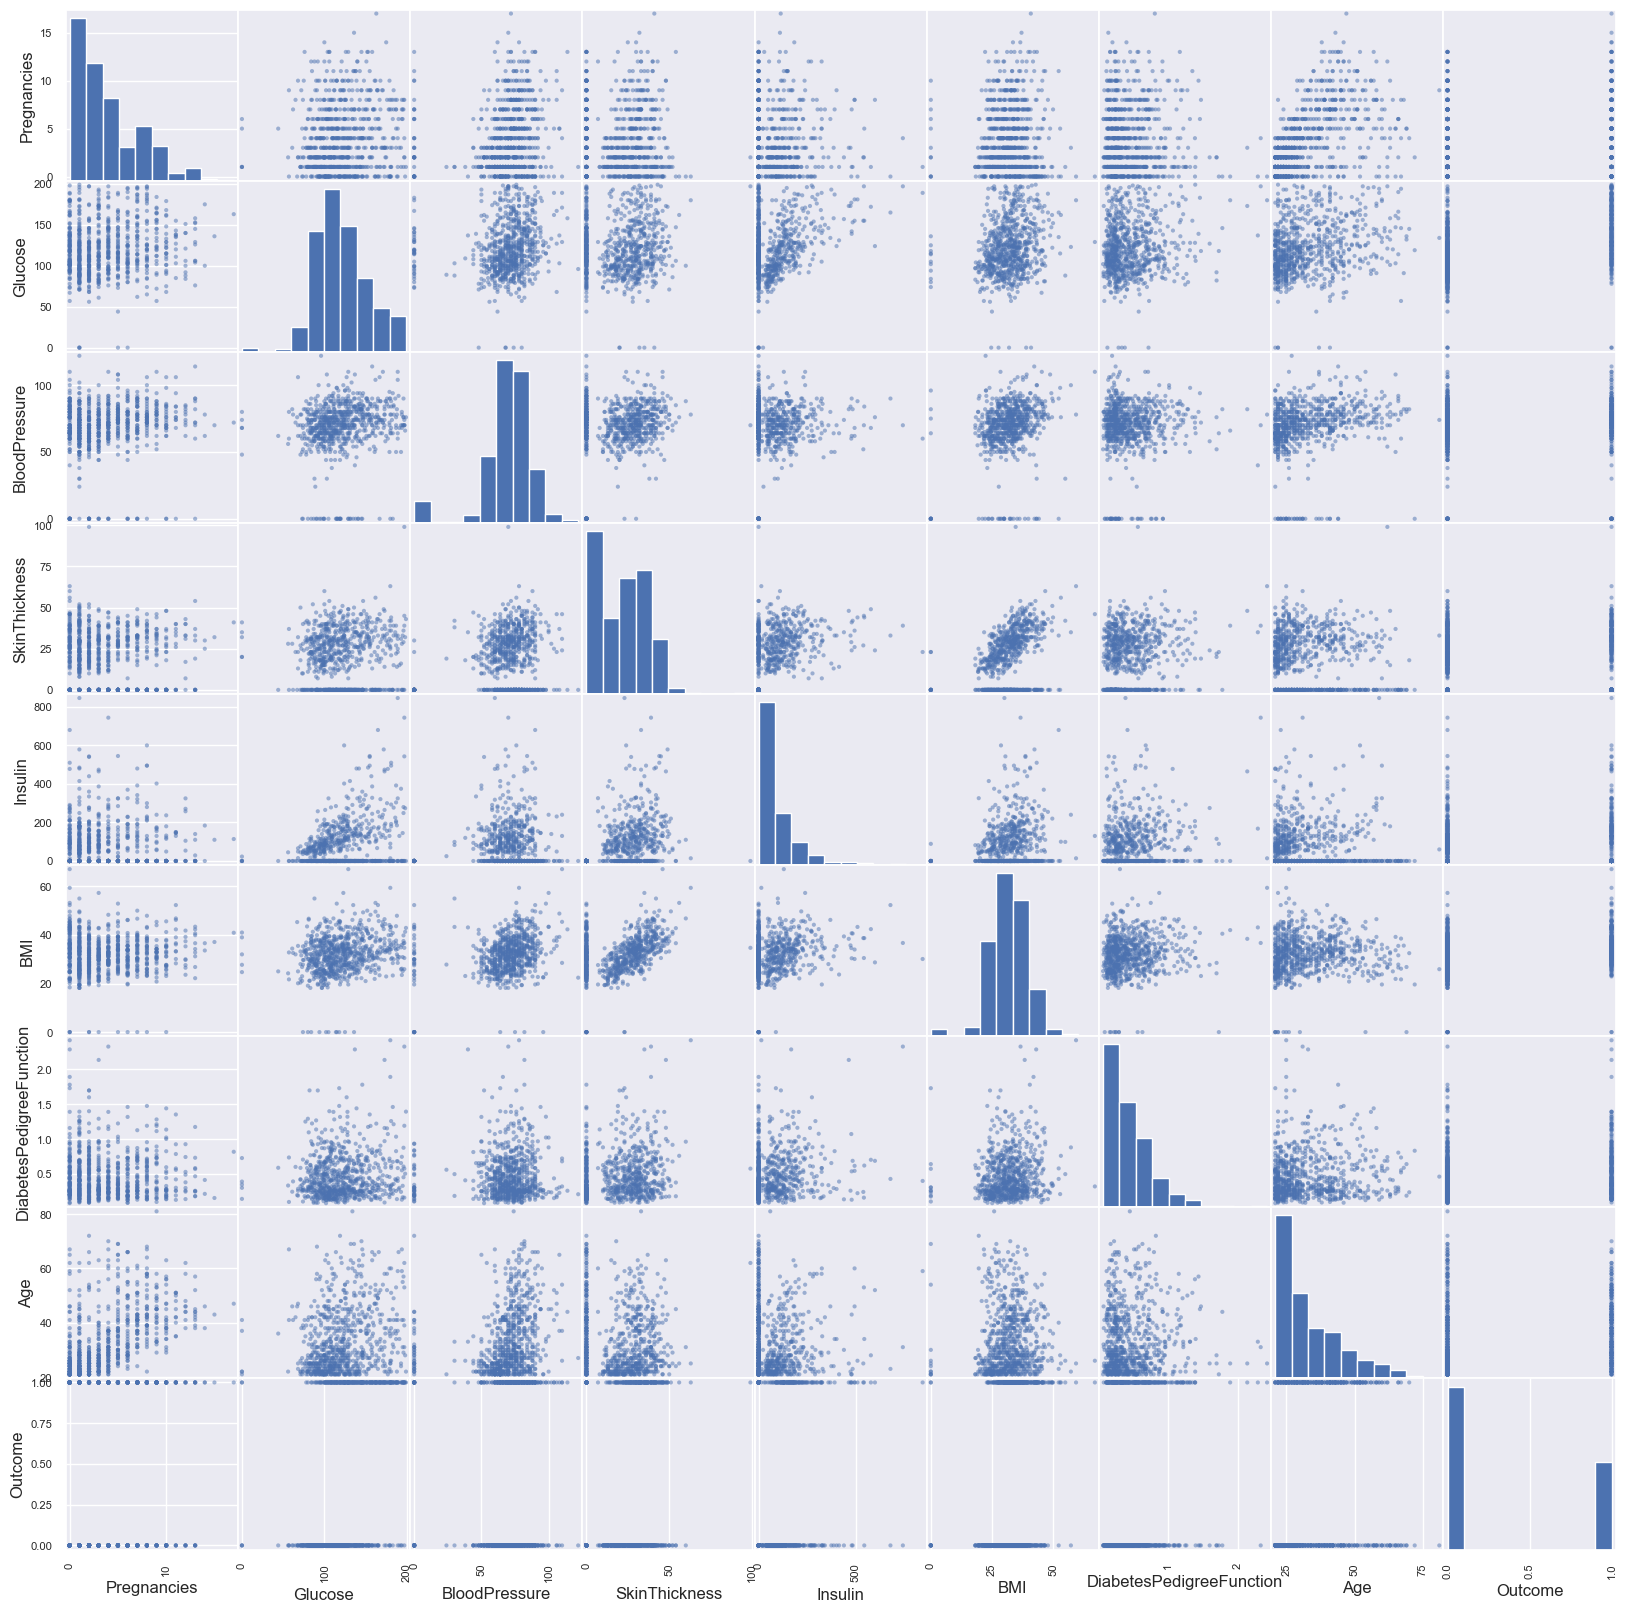

In [19]:
p=scatter_matrix(diabetes_df,figsize=(20,20))

## Pairplot untuk mengexplore hubungan antar variabel

Orange : Diabetes
Biru : Bebas Diabetes

Contoh di Glukosa 170+ dan Tekanan Darah 60+ kita dapat menyimpulkan probabilitas terkena diabetesnya tinggi

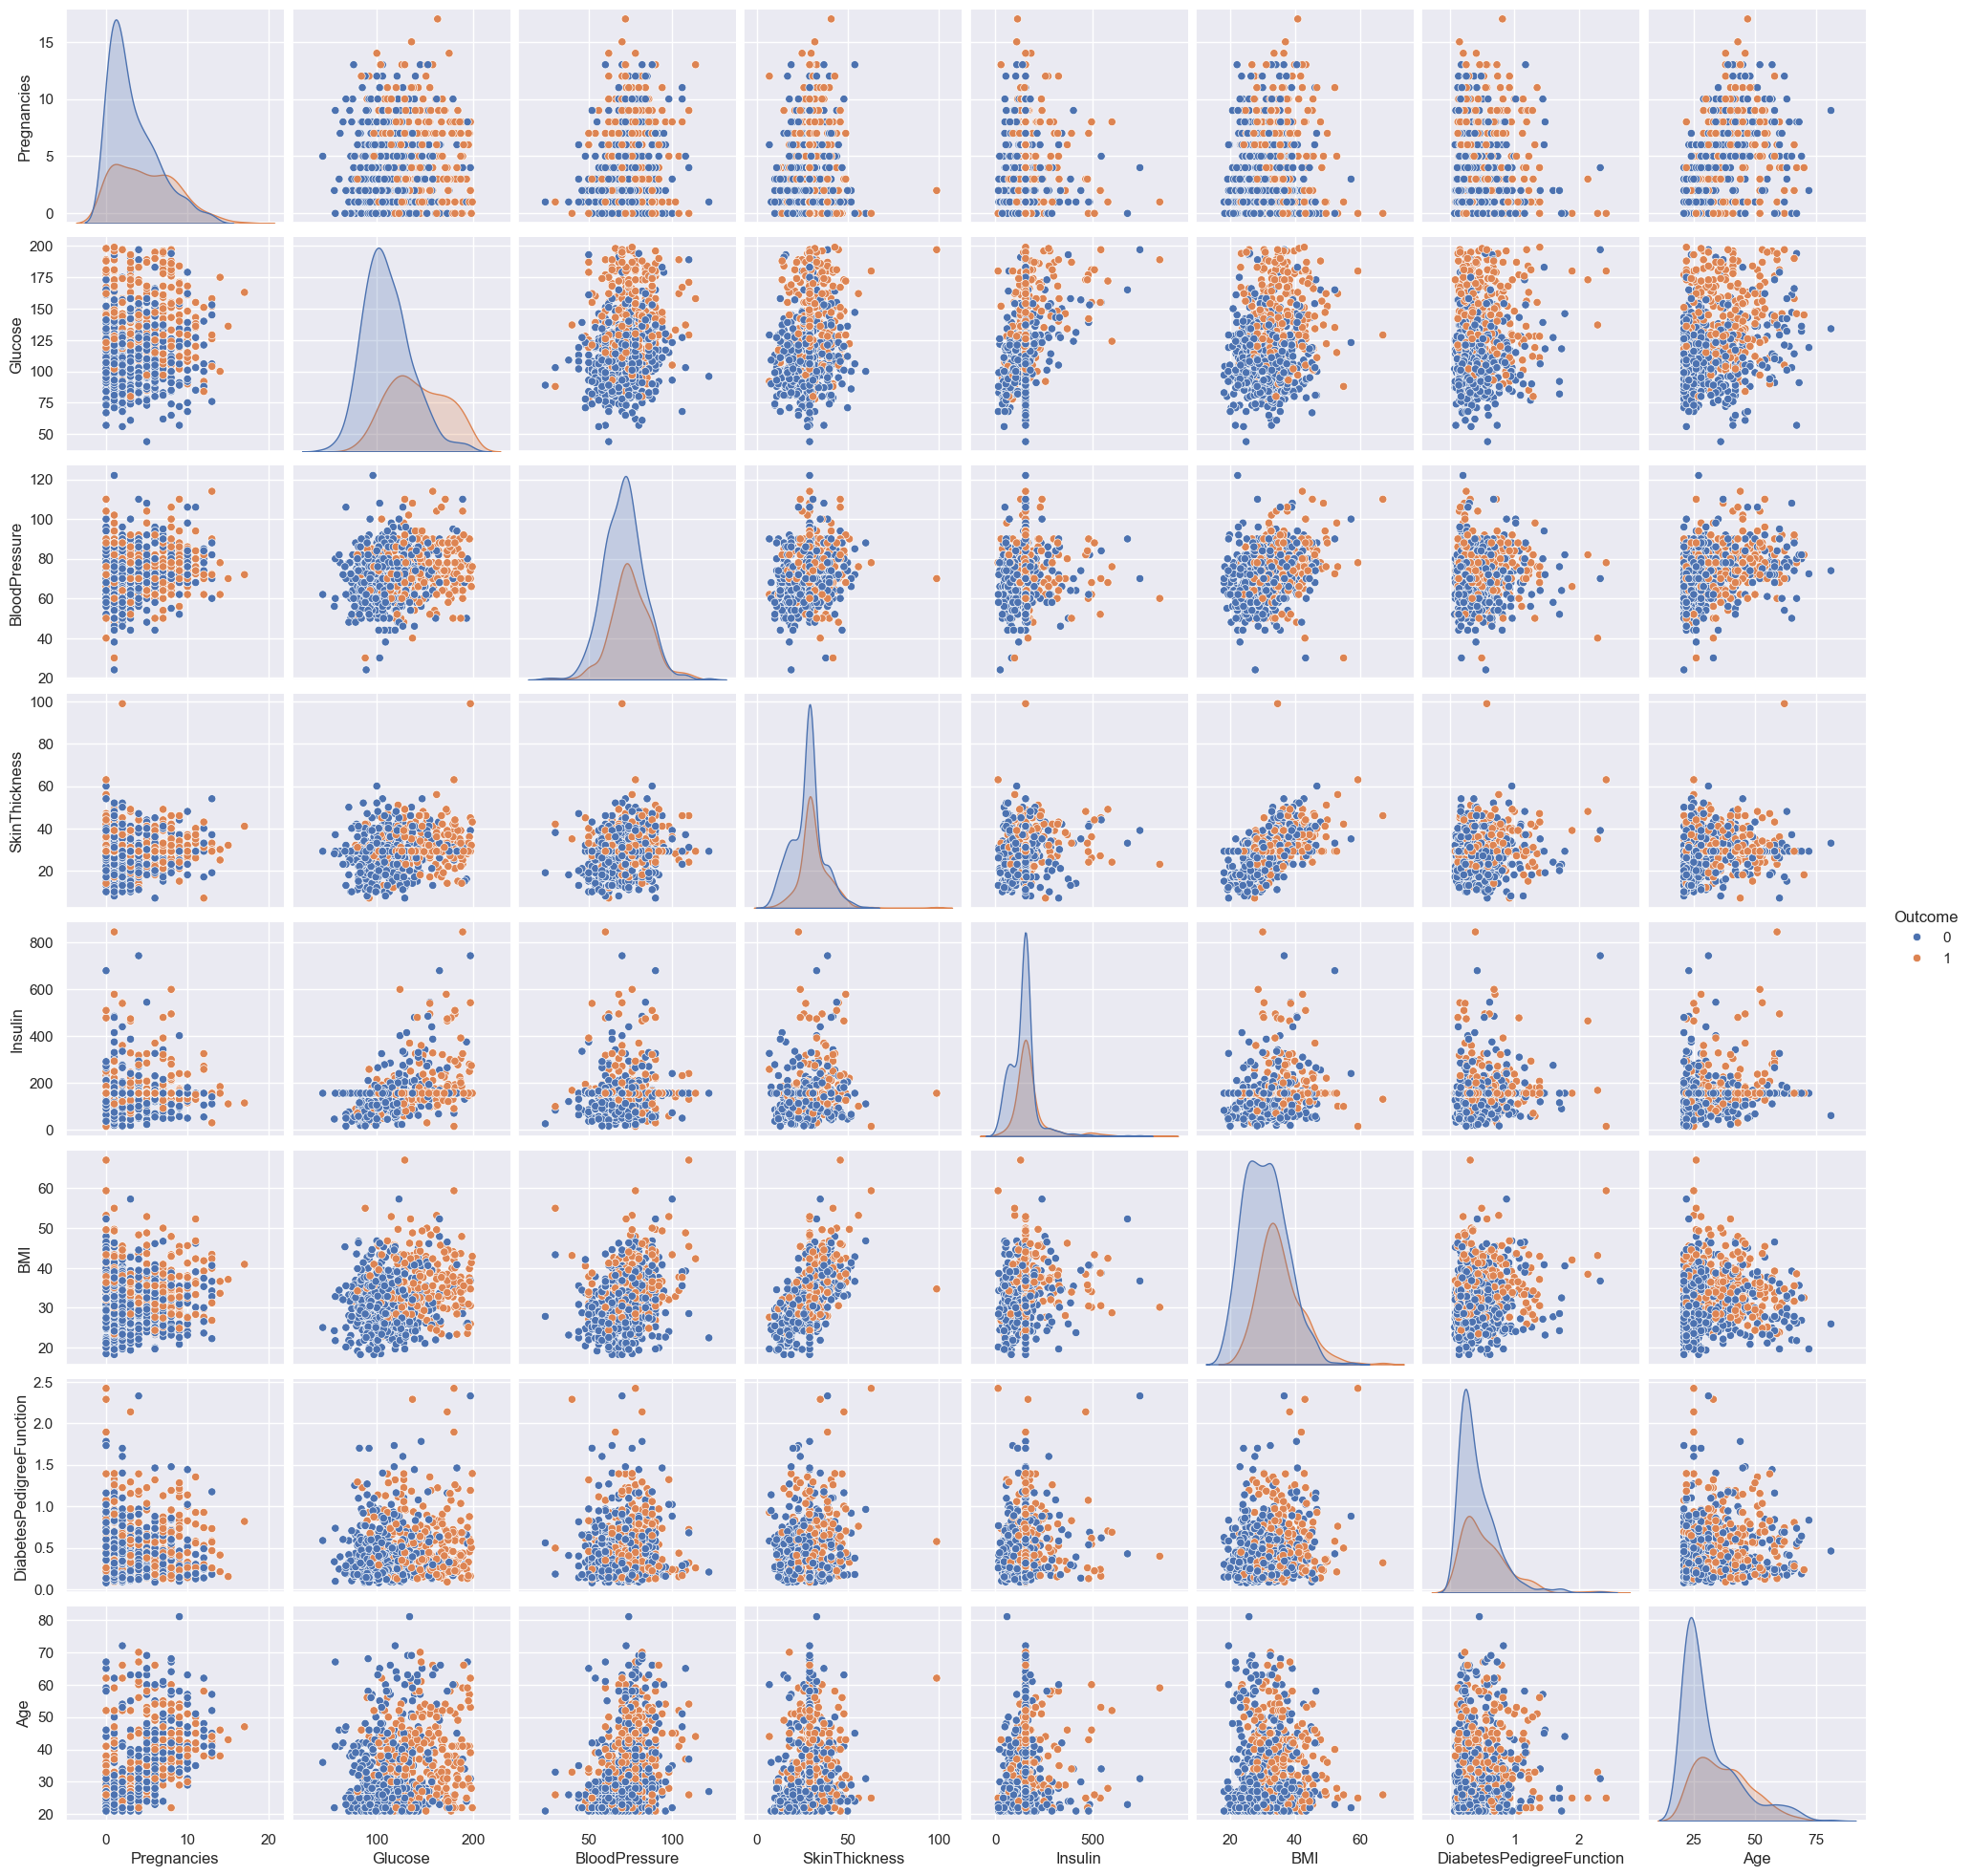

In [20]:
p=sns.pairplot(diabetes_df_copy, hue = 'Outcome')

## Heatmap Korelasi

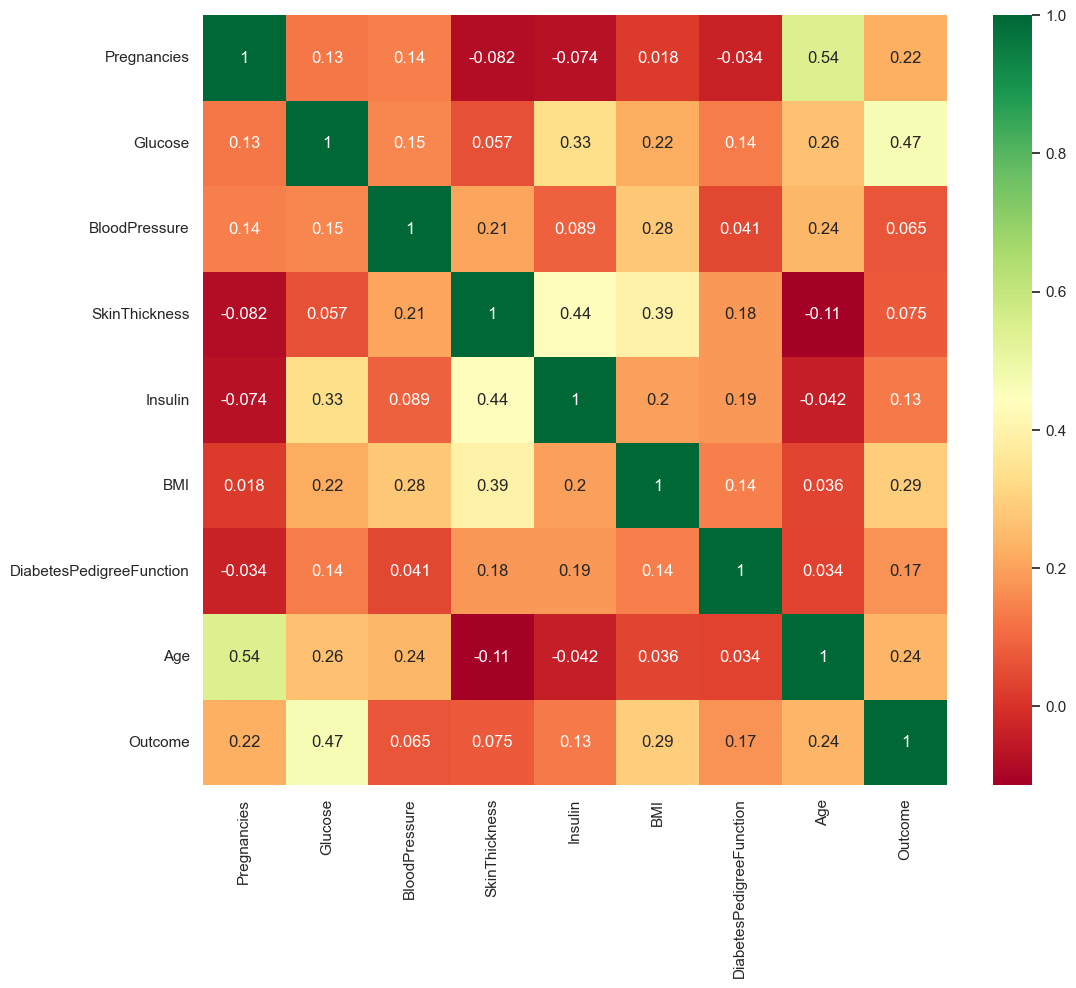

In [21]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')

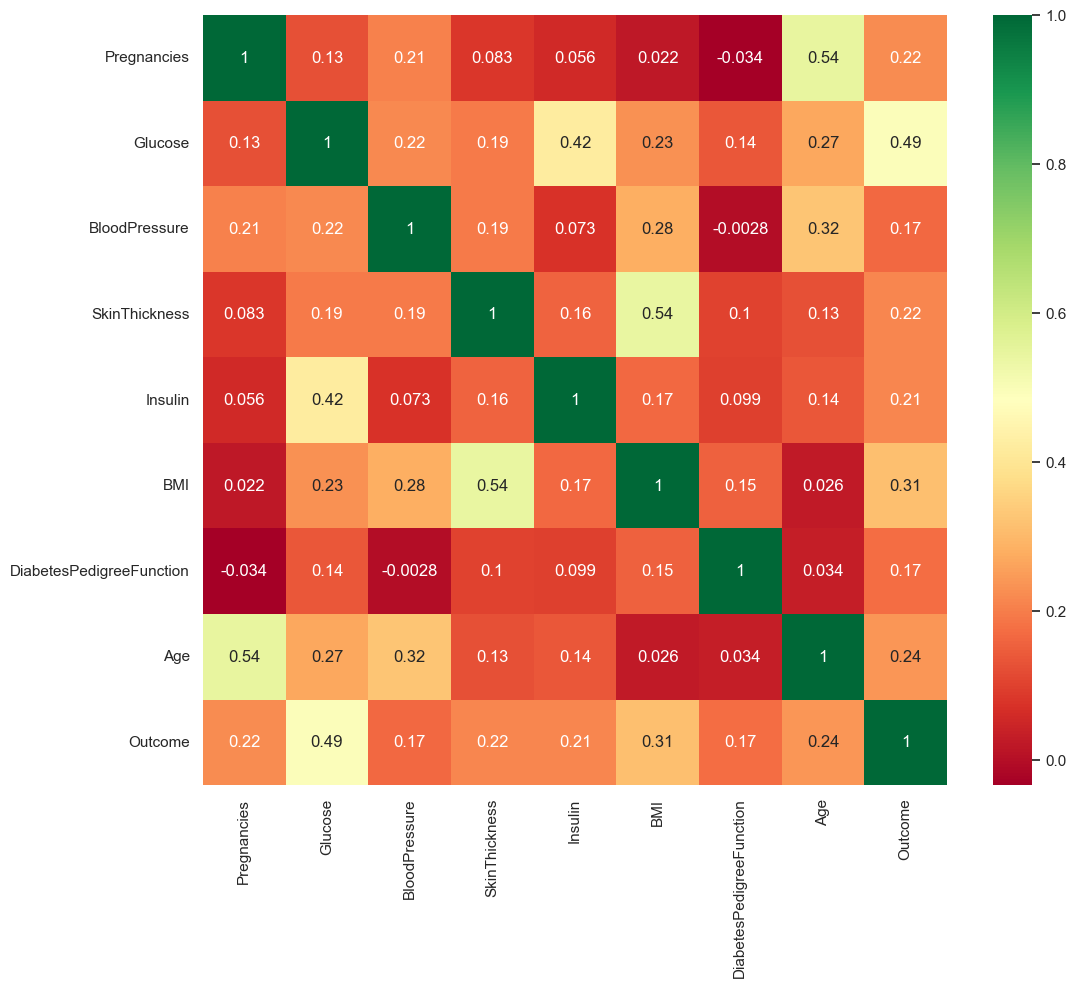

In [22]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap='RdYlGn')

## Scaling Data

Menormalisasikan skala data sehingga rata-rata menjadi 0 dan varians menjadi 1

In [23]:
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [24]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"], axis=1)), 
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  
0  0.166292                  0.468492  1.425995  
1 -0.852531                 -0.365061 -0.190672  
2 -1.332833                  0.604397 -0.105584  
3 -0.634212                 -0.920763 -1.041549  
4  1.548980                  5.484909 -0.020496

## Pembagian Data Train dan Test

In [25]:
y = diabetes_df_copy.Outcome

In [26]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [28]:
test_scores = []

train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Membuat Model

## Pemodelan K-Nearest Neighbors (KNN)

In [29]:
train_scores

[1.0,
 0.84765625,
 0.865234375,
 0.83203125,
 0.8359375,
 0.806640625,
 0.81640625,
 0.8046875,
 0.802734375,
 0.79296875,
 0.80859375,
 0.794921875,
 0.796875,
 0.79296875]

In [30]:
test_scores

[0.7265625,
 0.73046875,
 0.75390625,
 0.74609375,
 0.734375,
 0.7265625,
 0.74609375,
 0.73046875,
 0.73046875,
 0.72265625,
 0.76171875,
 0.7265625,
 0.75390625,
 0.73828125]

In [31]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [32]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [11]


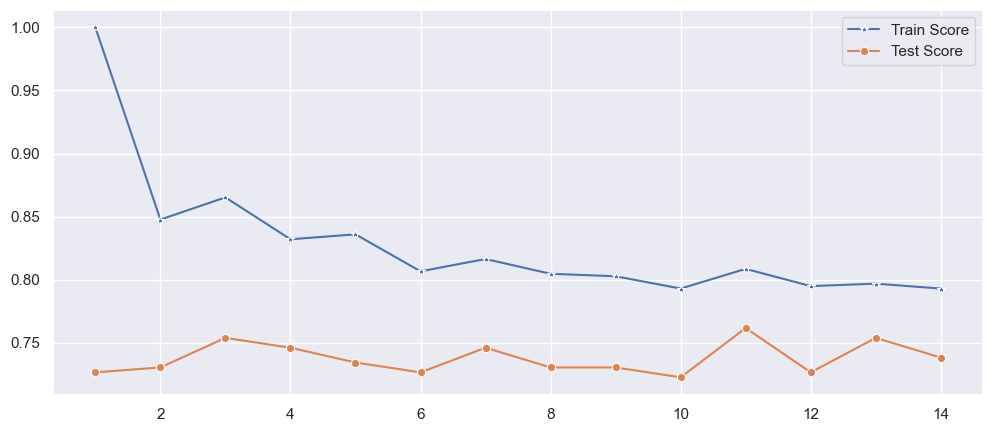

In [33]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker="*", label="Train Score")
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label="Test Score")

K11 adalah best result jadi K11 digunakan untuk final model

## Membuat dan Melatih Model KNN

In [34]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print("Accuracy on test set: {:.2f}%".format(score * 100))

Accuracy on test set: 76.17%


## Visualisasi Batas Keputusan (Decision Boundary)

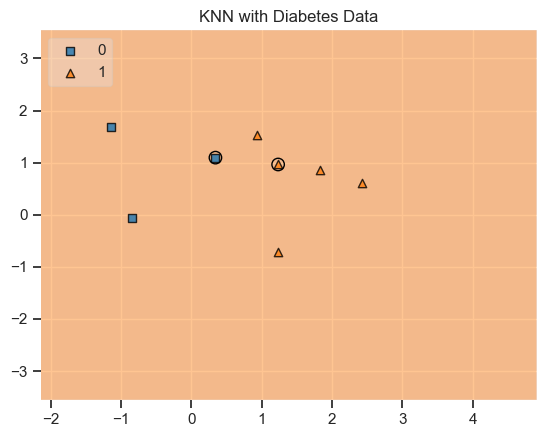

In [35]:
from mlxtend.plotting import plot_decision_regions

value = 20000
width = 20000

# Assuming features 0 and 1 are used for plotting
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values, feature_index=[0, 1])

plt.title('KNN with Diabetes Data')
plt.show()

## Confusion Matrix

0: True Negative
1: True Positive

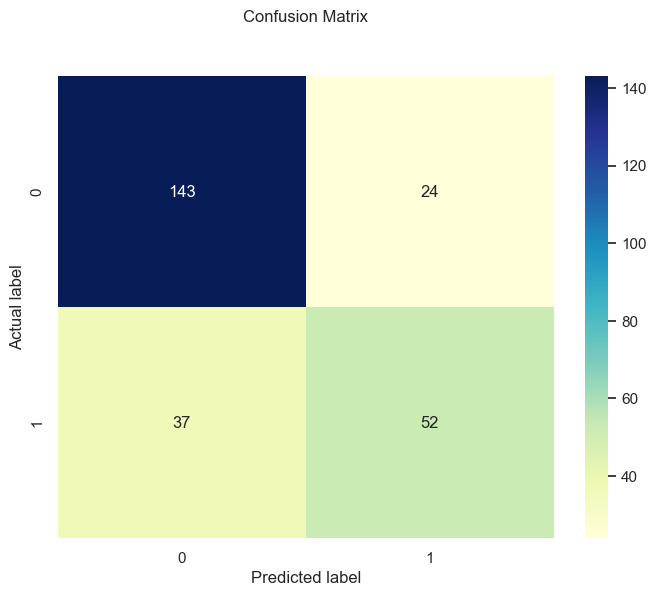

In [36]:
y_pred = knn.predict(X_test)

# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Classification Report

In [37]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.58      0.63        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.73       256
weighted avg       0.76      0.76      0.76       256



## ROC dan AUC Curve

In [38]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

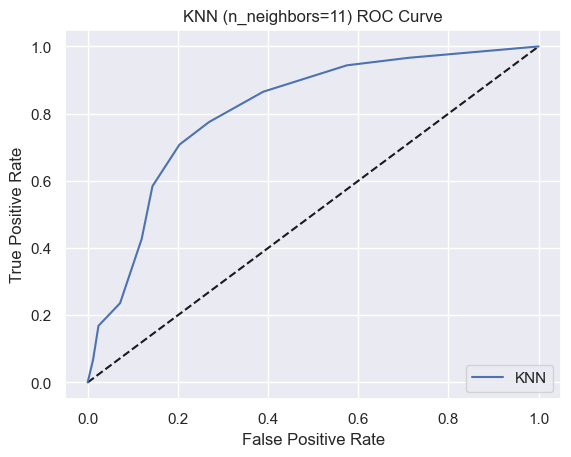

In [39]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN (n_neighbors=11) ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
roc_auc_score(y_test, y_pred_proba)

0.8072730942609163

## Grid Search untuk Memilih Parameter Terbaik

In [41]:
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print("Best Score:", knn_cv.best_score_)
print("Best Parameters:", knn_cv.best_params_)

Best Score: 0.7748068924539513
Best Parameters: {'n_neighbors': 25}


# Melakukan Validasi Silang yang Lebih Kompleks (Nested Cross-Validation)

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

def handle_imbalance(X_train, y_train, sampling_strategy='auto'):
    """
    Menangani ketidakseimbangan kelas menggunakan teknik oversampling SMOTE.
    
    Args:
        X_train: Data fitur untuk training.
        y_train: Label untuk training.
        sampling_strategy: Strategi sampling untuk SMOTE.
        
    Returns:
        X_train_res: Data fitur setelah resampling.
        y_train_res: Label setelah resampling.
        scaler: Scaler yang digunakan untuk standarisasi data.
    """
    sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_res = scaler.fit_transform(X_train_res)

    return X_train_res, y_train_res, scaler


In [47]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

def nested_cross_validation(X_train, y_train, model, param_grid, inner_cv_splits=5, outer_cv_splits=5):
    """
    Melakukan nested cross-validation untuk menghindari overfitting.
    
    Args:
        X_train: Data fitur untuk training.
        y_train: Label untuk training.
        model: Model yang akan dievaluasi.
        param_grid: Parameter grid untuk grid search.
        inner_cv_splits: Jumlah split untuk inner cross-validation.
        outer_cv_splits: Jumlah split untuk outer cross-validation.
        
    Returns:
        best_model: Model terbaik yang dihasilkan dari nested cross-validation.
        scores: Skor akurasi dari outer cross-validation.
        best_params: Parameter terbaik dari model.
    """
    inner_cv = StratifiedKFold(n_splits=inner_cv_splits, shuffle=True, random_state=42)
    outer_cv = StratifiedKFold(n_splits=outer_cv_splits, shuffle=True, random_state=42)

    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy')
    scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    return best_model, scores, best_params


Data loaded successfully.
Data resampled and standardized.
Starting nested cross-validation...
KNN Nested cross-validation completed.
Best KNN Parameters: {'n_neighbors': 1}
Random Forest Nested cross-validation completed.
Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Evaluating KNN Model:
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       140
           1       0.65      0.80      0.72        60

    accuracy                           0.81       200
   macro avg       0.78      0.81      0.79       200
weighted avg       0.83      0.81      0.81       200



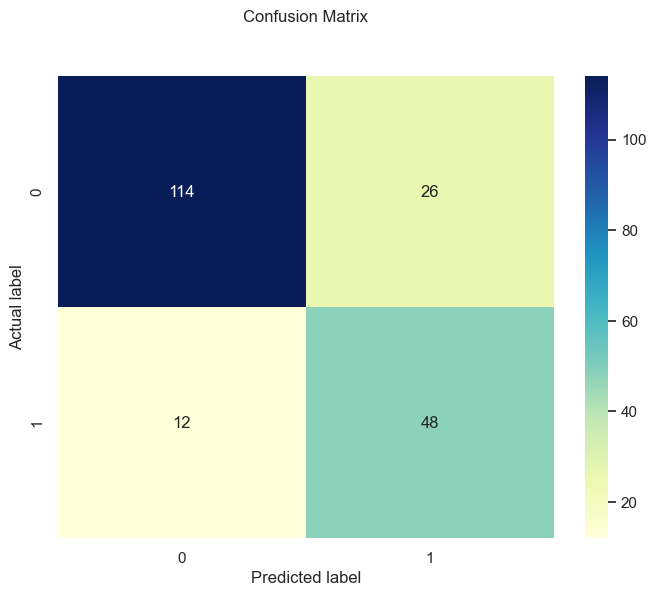

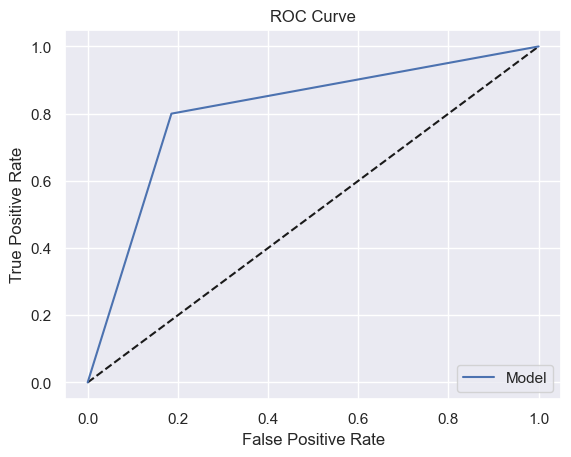

ROC AUC Score: 0.81
Evaluating Random Forest Model:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       140
           1       0.93      0.92      0.92        60

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200



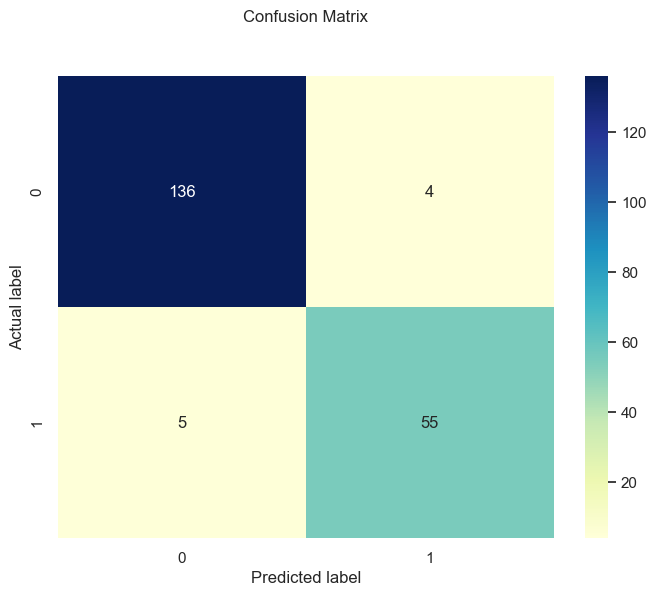

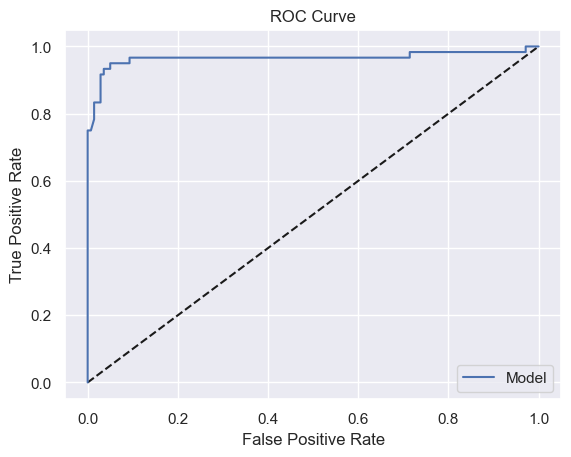

ROC AUC Score: 0.97
KNN Cross-Validation Accuracy Scores: [0.87946429 0.90625    0.93303571 0.87892377 0.82511211]
Random Forest Cross-Validation Accuracy Scores: [0.88839286 0.94196429 0.92857143 0.89686099 0.91928251]


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting
%matplotlib inline

# Load dataset
# Assuming 'data' is a pandas DataFrame containing the dataset
# data = pd.read_csv('your_dataset.csv') # Uncomment and set the correct path to your dataset
# X = data.drop('Outcome', axis=1)
# y = data['Outcome']

# Dummy dataset for illustration (comment this out when using real dataset)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.7, 0.3], random_state=42)

print("Data loaded successfully.")

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance
X_train_res, y_train_res, scaler = handle_imbalance(X_train, y_train)
X_test = scaler.transform(X_test)

print("Data resampled and standardized.")

# Define parameter grids
param_grid_knn = {'n_neighbors': np.arange(1, 50)}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

# Initialize classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

print("Starting nested cross-validation...")

# Perform nested cross-validation for KNN
best_knn, knn_scores, best_knn_params = nested_cross_validation(X_train_res, y_train_res, knn, param_grid_knn)
print("KNN Nested cross-validation completed.")
print("Best KNN Parameters:", best_knn_params)

# Perform nested cross-validation for Random Forest
best_rf, rf_scores, best_rf_params = nested_cross_validation(X_train_res, y_train_res, rf, param_grid_rf)
print("Random Forest Nested cross-validation completed.")
print("Best Random Forest Parameters:", best_rf_params)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC AUC Score: {:.2f}".format(roc_auc))

# Evaluate KNN
print("Evaluating KNN Model:")
evaluate_model(best_knn, X_test, y_test)

# Evaluate Random Forest
print("Evaluating Random Forest Model:")
evaluate_model(best_rf, X_test, y_test)

# Print cross-validation scores
print("KNN Cross-Validation Accuracy Scores:", knn_scores)
print("Random Forest Cross-Validation Accuracy Scores:", rf_scores)


# 4. Proses Learning / Modeling
Modeling dilakukan menggunakan algoritma K-Nearest Neighbors (KNN). Proses ini melibatkan:

1. Membagi dataset menjadi data training dan testing.
2. Melakukan oversampling menggunakan SMOTE untuk menangani ketidakseimbangan kelas.
3. Melatih model KNN dengan data training.
4. Melakukan validasi silang menggunakan nested cross-validation untuk menghindari overfitting.
5. Mengoptimalkan hyperparameter model menggunakan GridSearchCV.

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Split Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Melatih Model KNN dan Optimisasi Hyperparameter
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': list(range(1, 31))}

# Definisikan StratifiedKFold untuk cross-validation
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV untuk optimisasi hyperparameter
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=inner_cv, scoring='accuracy', n_jobs=-1)

# Fit model dengan data yang telah di-resample
grid_search.fit(X_train_res, y_train_res)

# Dapatkan estimator terbaik
best_knn = grid_search.best_estimator_

# Menampilkan hasil
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best parameters: {'n_neighbors': 1}
Best cross-validation accuracy: 0.9070


# 5. Performa Model
Performa model dievaluasi menggunakan metrik seperti akurasi, precision, recall, dan F1-score pada data testing.

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi pada data testing
y_pred = best_knn.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Akurasi: 0.8
Precision: 0.6923076923076923
Recall: 0.6
F1-Score: 0.6428571428571429


# 6. Diskusi Hasil dan Kesimpulan
## Diskusi Hasil
Model KNN menunjukkan performa yang baik dalam memprediksi diabetes. Namun, ada beberapa hal yang perlu diperhatikan:

- Ketidakseimbangan kelas masih menjadi tantangan meskipun sudah dilakukan oversampling.
- Akurasi model dapat ditingkatkan dengan melakukan feature engineering lebih lanjut dan mencoba algoritma lain.
## Kesimpulan
Proyek ini berhasil membangun model prediksi diabetes menggunakan KNN dengan performa yang cukup baik. Penggunaan teknik oversampling dan validasi silang membantu meningkatkan akurasi model. Langkah selanjutnya adalah melakukan pengujian dengan algoritma lain dan lebih banyak eksperimen feature engineering untuk meningkatkan performa model.